# examining the RUCA classifications (urban versus rural communities)

In [2]:
import os
import numpy as np 
from astropy.table import join as aJ
from astropy.table import Table as aT

In [3]:
import corner as DFM
# --- plotting ---
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['text.usetex'] = True
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['axes.linewidth'] = 1.5
mpl.rcParams['axes.xmargin'] = 1
mpl.rcParams['xtick.labelsize'] = 'x-large'
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['xtick.major.width'] = 1.5
mpl.rcParams['ytick.labelsize'] = 'x-large'
mpl.rcParams['ytick.major.size'] = 5
mpl.rcParams['ytick.major.width'] = 1.5
mpl.rcParams['legend.frameon'] = False
%matplotlib inline

## load compiled NOAH2 dataset

In [4]:
fema = aT.read('../dat/noah2.participants.v0.0.csv')

In [5]:
activities = [] 
for col in fema.colnames: 
    if 's_c' in col and '_avg' not in col:
        activities.append(col[2:])

In [6]:
activities

['c310',
 'c320',
 'c330',
 'c340',
 'c350',
 'c360',
 'c370',
 'c410',
 'c420',
 'c430',
 'c440',
 'c450',
 'c510',
 'c520',
 'c530',
 'c540',
 'c610',
 'c620',
 'c630']

In [5]:
columns = ['amountPaidOnTotalClaim_per_policy', 'mean_rainfall', 'avg_risk_score_all', 
           'median_household_income', 'population', 'renter_fraction', 'educated_fraction', 'white_fraction'] 
labels = ['claim per policy', 'rainfall', 'flood risk', 'income', 
          'population', 'renter fraction', 'educated fraction', 'white fraction']

## lets pick the urban/rural communities 
https://www.ers.usda.gov/data-products/rural-urban-commuting-area-codes/documentation/

- 1	Metropolitan area core: primary flow within an urbanized area (UA)
- 2	Metropolitan area high commuting: primary flow 30% or more to a UA
- 3	Metropolitan area low commuting: primary flow 10% to 30% to a UA
- 4	Micropolitan area core: primary flow within an urban cluster of 10,000 to 49,999 (large UC)
- 5	Micropolitan high commuting: primary flow 30% or more to a large UC
- 6	Micropolitan low commuting: primary flow 10% to 30% to a large UC
- 7	Small town core: primary flow within an urban cluster of 2,500 to 9,999 (small UC)
- 8	Small town high commuting: primary flow 30% or more to a small UC
- 9	Small town low commuting: primary flow 10% to 30% to a small UC
- 10	Rural areas: primary flow to a tract outside a UA or UC
- 99	Not coded: Census tract has zero population and no rural-urban identifier information

note: 
- RUCA 1 and RUCA 2 agree > 99% of the time

In [38]:
metro = ((fema['RUCA1'] == 1))# | (fema['RUCA1'] == 2) | (fema['RUCA1'] == 3)) 
micro = ((fema['RUCA1'] == 4) | (fema['RUCA1'] == 5) | (fema['RUCA1'] == 6))
small = ((fema['RUCA1'] == 7) | (fema['RUCA1'] == 8) | (fema['RUCA1'] == 9))
rural = ((fema['RUCA1'] == 10))

print('%i metro communities; %.2f of the total' % (np.sum(metro), np.mean(metro)))
print('%i micro communities; %.2f of the total' % (np.sum(micro), np.mean(micro)))
print('%i small communities; %.2f of the total' % (np.sum(small), np.mean(small)))
print('%i rural communities; %.2f of the total' % (np.sum(rural), np.mean(rural)))

165475 metro communities; 0.84 of the total
18098 micro communities; 0.09 of the total
4189 small communities; 0.02 of the total
1206 rural communities; 0.01 of the total


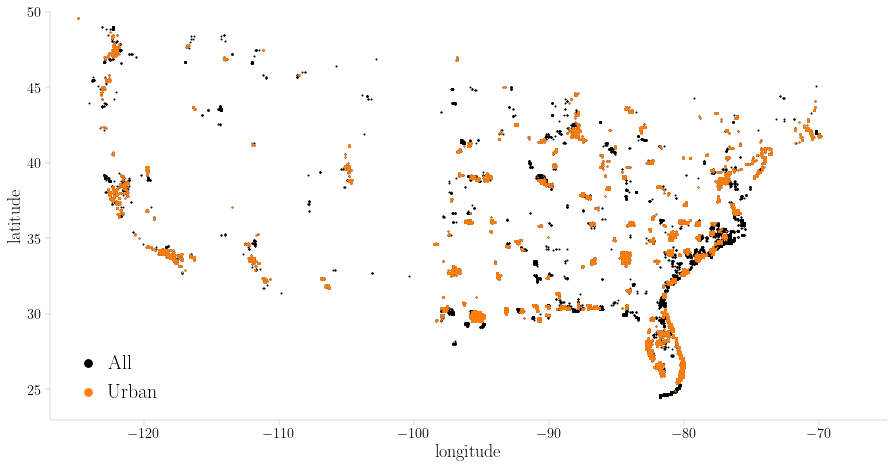

In [31]:
xlim = (-127, -65)
ylim = (23, 50) 

fig = plt.figure(figsize=(15,7.5))
sub = fig.add_subplot(111)

sub.scatter(fema['longitude'], fema['latitude'], c='k', s=1, rasterized=True)
sub.scatter(fema['longitude'][metro], fema['latitude'][metro], c='C1', s=1, rasterized=True)
#sub.scatter(fema['longitude'][rural], fema['latitude'][rural], c='C2', s=1, rasterized=True)

sub.set_xlabel('longitude', fontsize=18)
sub.set_ylabel('latitude', fontsize=18)
sub.set_xlim(xlim)
sub.set_ylim(ylim)
#sub.axis('off')
sub.scatter([], [], c='k', s=60, label='All')
sub.scatter([], [], c='C1', s=60, label='Urban')
#sub.scatter([], [], c='C2', s=60, label='Rural')
sub.legend(loc='lower left', handletextpad=0, fontsize=20)

sub.spines['top'].set_linewidth(0)
sub.spines['right'].set_linewidth(0)
sub.spines['bottom'].set_linewidth(0.3)
sub.spines['left'].set_linewidth(0.3)
sub.spines['bottom'].set_color('gray')
sub.spines['left'].set_color('gray')
sub.tick_params(width=0.3, color='gray')

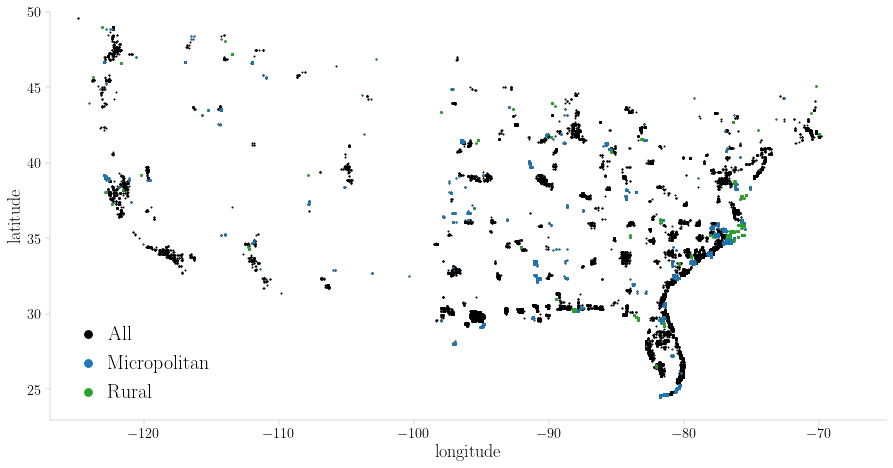

In [35]:
fig = plt.figure(figsize=(15,7.5))
sub = fig.add_subplot(111)

sub.scatter(fema['longitude'], fema['latitude'], c='k', s=1, rasterized=True)
sub.scatter(fema['longitude'][micro], fema['latitude'][micro], c='C0', s=1, rasterized=True)
sub.scatter(fema['longitude'][rural], fema['latitude'][rural], c='C2', s=3, rasterized=True)

sub.set_xlabel('longitude', fontsize=18)
sub.set_ylabel('latitude', fontsize=18)
sub.set_xlim(xlim)
sub.set_ylim(ylim)
#sub.axis('off')
sub.scatter([], [], c='k', s=60, label='All')
sub.scatter([], [], c='C0', s=60, label='Micropolitan')
sub.scatter([], [], c='C2', s=60, label='Rural')
sub.legend(loc='lower left', handletextpad=0, fontsize=20)

sub.spines['top'].set_linewidth(0)
sub.spines['right'].set_linewidth(0)
sub.spines['bottom'].set_linewidth(0.3)
sub.spines['left'].set_linewidth(0.3)
sub.spines['bottom'].set_color('gray')
sub.spines['left'].set_color('gray')
sub.tick_params(width=0.3, color='gray')

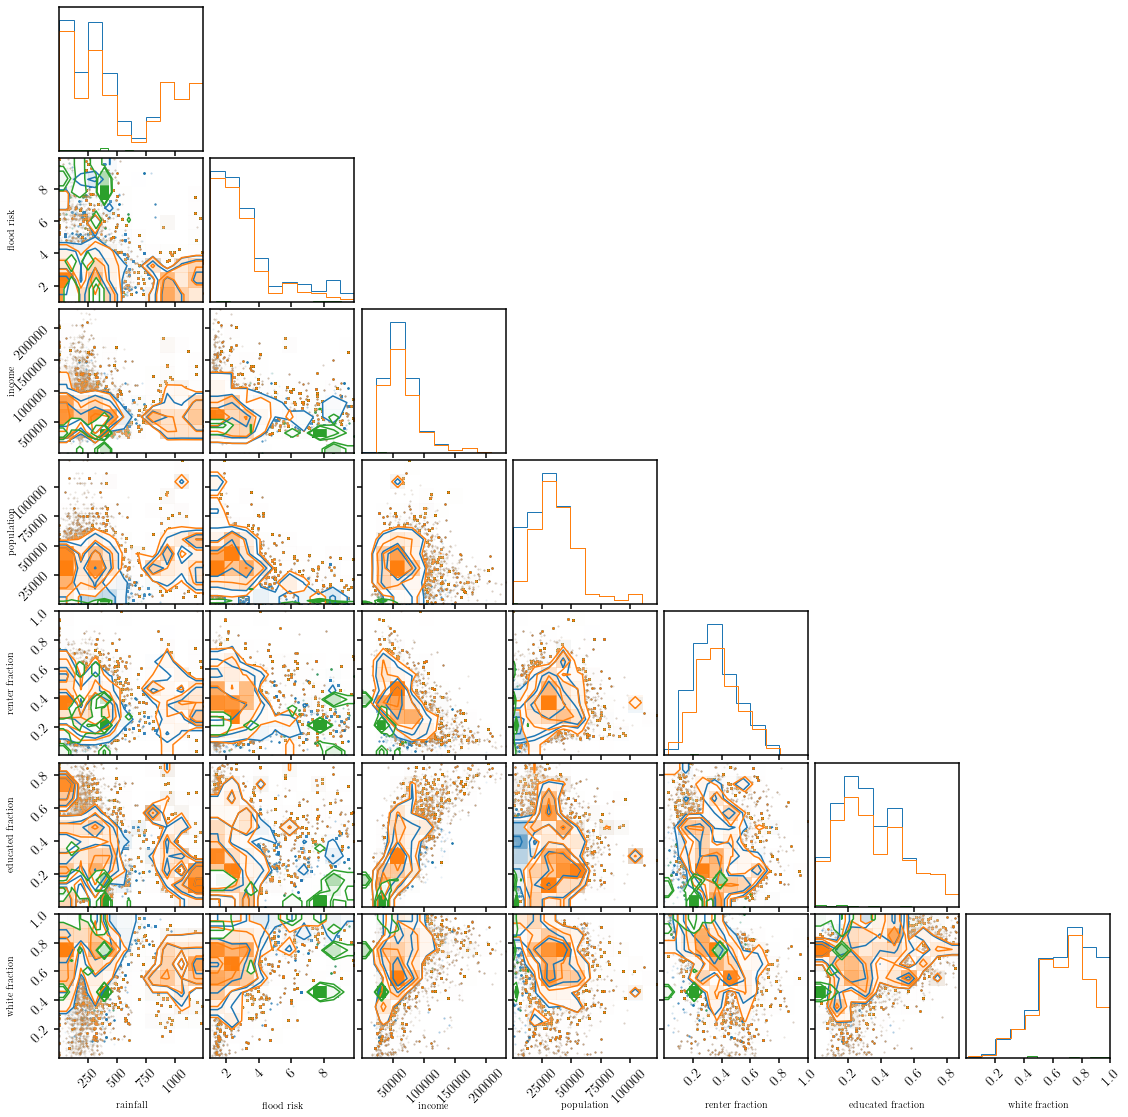

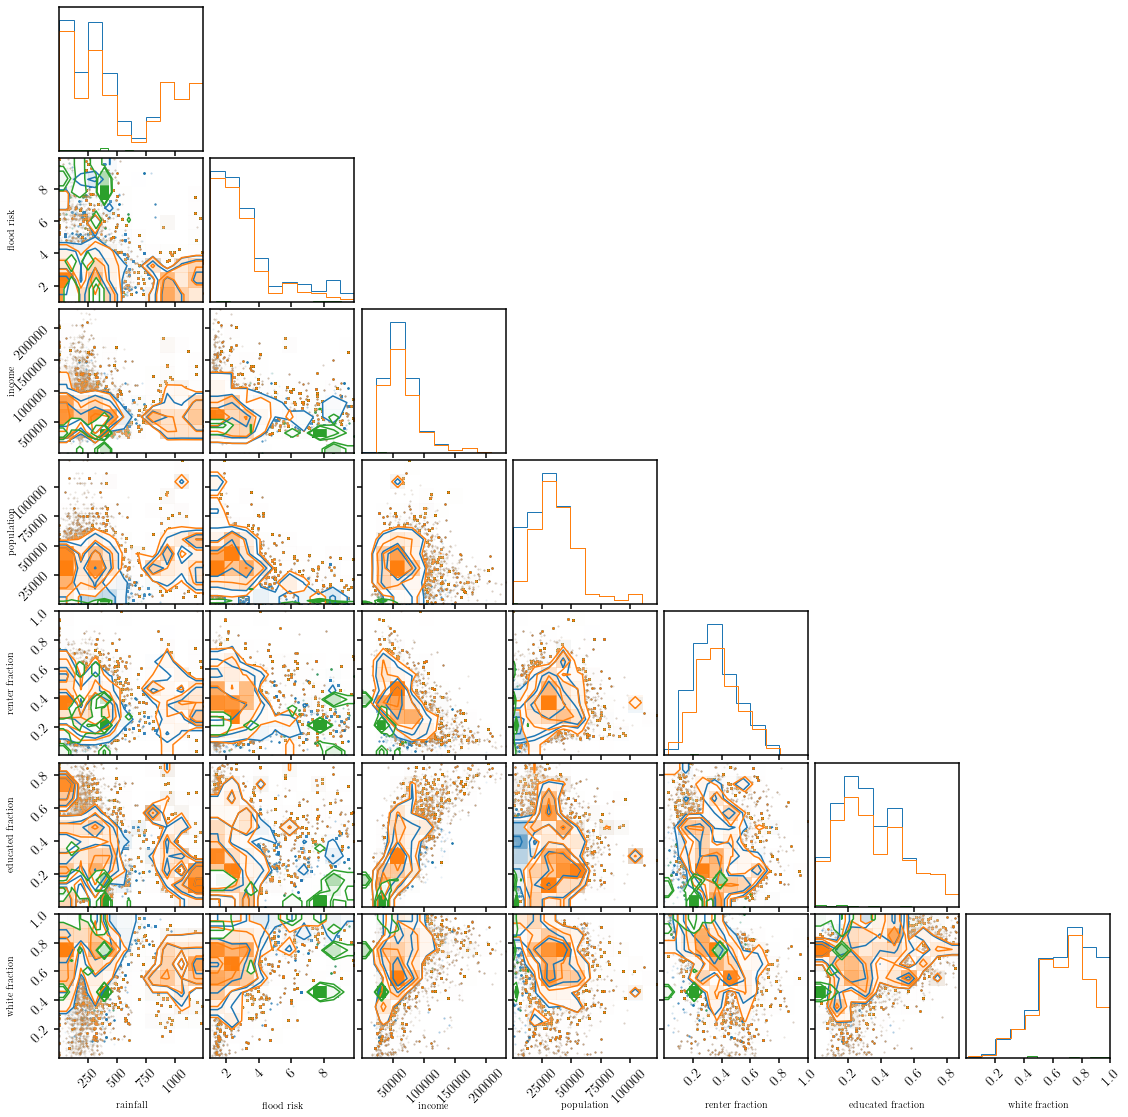

In [27]:
_data = np.array([np.array(fema[col]) for col in columns[1:]])

fig = DFM.corner(_data.T, bins=10, color='C0', labels=labels[1:])
DFM.corner(_data.T[metro], bins=10, color='C1', labels=labels[1:], fig=fig)
DFM.corner(_data.T[rural], bins=10, color='C2', labels=labels[1:], fig=fig)

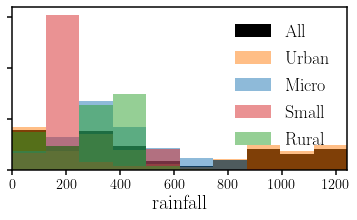

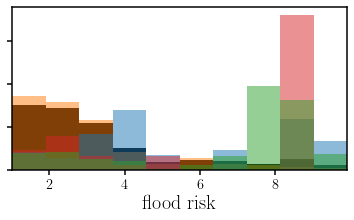

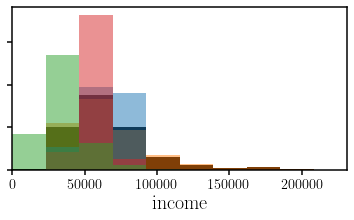

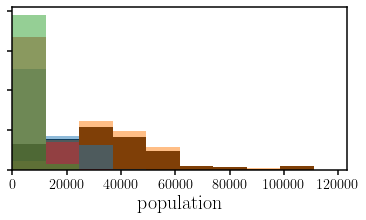

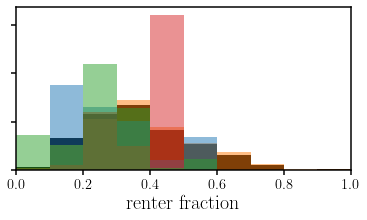

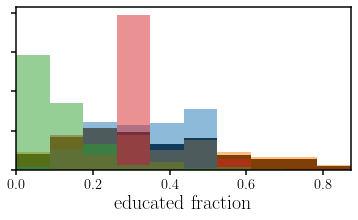

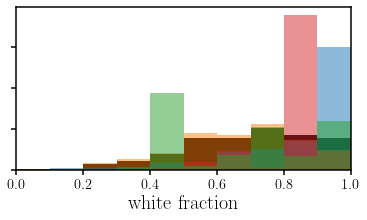

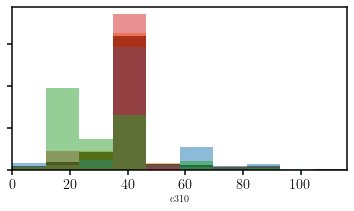

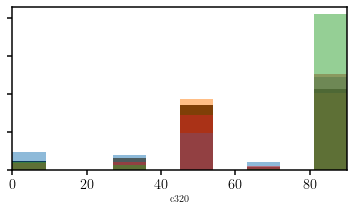

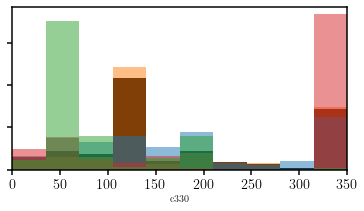

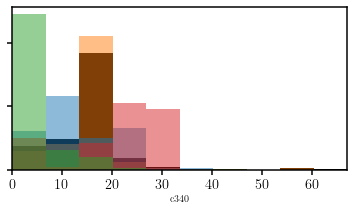

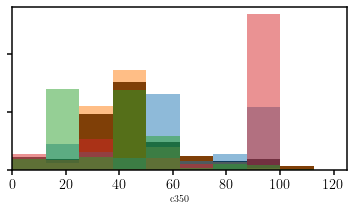

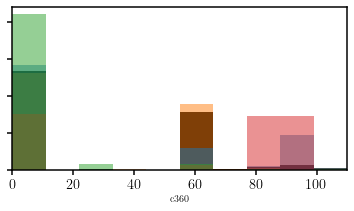

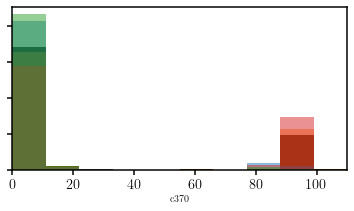

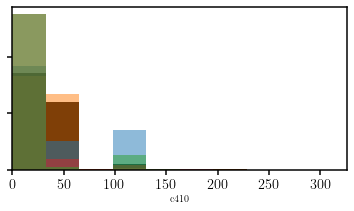

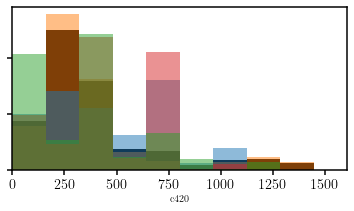

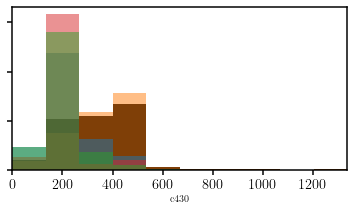

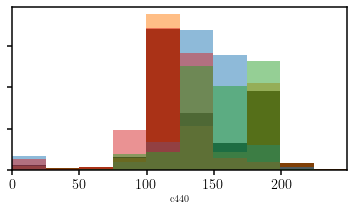

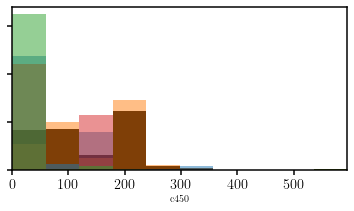

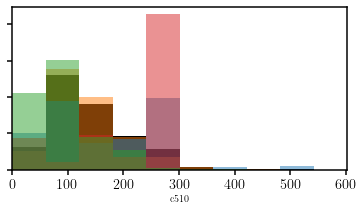

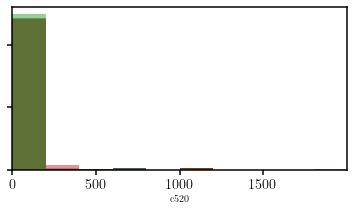

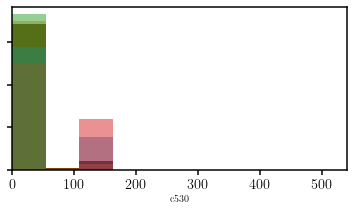

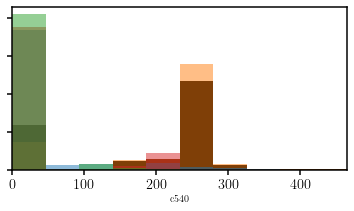

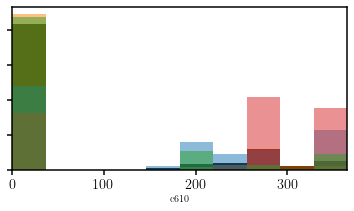

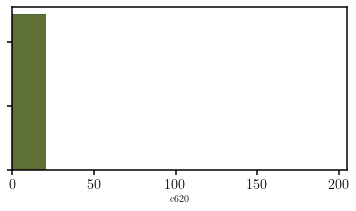

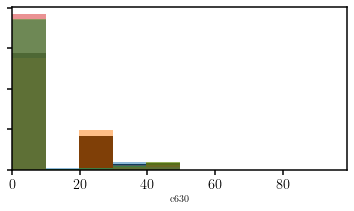

In [41]:
for i, col in enumerate(columns[1:] + activities): 
    xrange = fema[col].min(), fema[col].max()
    
    fig = plt.figure(figsize=(6,3))
    sub = fig.add_subplot(111)
    _ = sub.hist(fema[col], bins=10, color='k', density=True, label='All')
    _ = sub.hist(fema[col][metro], bins=10, color='C1', range=xrange, density=True, alpha=0.5, label='Urban')
    _ = sub.hist(fema[col][micro], bins=10, color='C0', range=xrange, density=True, alpha=0.5, label='Micro')
    _ = sub.hist(fema[col][small], bins=10, color='C3', range=xrange, density=True, alpha=0.5, label='Small')
    _ = sub.hist(fema[col][rural], bins=10, color='C2', range=xrange, density=True, alpha=0.5, label='Rural') 
    if i == 0: sub.legend(loc='upper right', fontsize=18)
    if i + 1 < len(columns): sub.set_xlabel(labels[i+1], fontsize=20)
    else: sub.set_xlabel(activities[i + 1 - len(columns)])
    sub.set_xlim(xrange)
    sub.set_yticklabels([])
    plt.show()